## Importing the neccessary Libraries

In [1]:
# supresses future warnings 
import warnings                                                 
warnings.simplefilter(action='ignore')

# Import the pandas library for df creation
import pandas as pd

# Import the NumPy library to use the random package
import numpy as np
import math

# Import the matplotlib library for plotting
import matplotlib.pyplot as plt

# set plot style
plt.style.use('seaborn-whitegrid')

# Use the magic function to ensure plots render in a notebook
%matplotlib inline

# Import the seaborn library for plotting
import seaborn as sns

# Importing the sklearn for modulation and metrics calculation
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.regression import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


#### Printing the Data overview

In [2]:
### Importing the downloaded dataset

df= pd.read_csv(r'movieReplicationSet.csv')

### Making a copy to be used in the part 5

dataframe = df.copy()

In [3]:
## printing the overview

df.head()

The Life of David Gale (2003)  Wing Commander (1999)  \
0                            NaN                    NaN   
1                            NaN                    NaN   
2                            NaN                    NaN   
3                            NaN                    NaN   
4                            NaN                    NaN   

   Django Unchained (2012)  Alien (1979)  \
0                      4.0           NaN   
1                      1.5           NaN   
2                      NaN           NaN   
3                      2.0           NaN   
4                      3.5           NaN   

   Indiana Jones and the Last Crusade (1989)  Snatch (2000)  \
0                                        3.0            NaN   
1                                        NaN            NaN   
2                                        NaN            NaN   
3                                        3.0            NaN   
4                                        0.5            NaN   

   Rambo: First Blood Part II (1985)  Fargo (1996)  \
0                                NaN           NaN   
1                                NaN           NaN   
2                                NaN           NaN   
3                                NaN           NaN   
4                                0.5           1.0   

   Let the Right One In (2008)  Black Swan (2010)  ...  \
0                          NaN                NaN  ...   
1                          NaN                NaN  ...   
2                          NaN                NaN  ...   
3                          NaN                4.0  ...   
4                          NaN                0.0  ...   

   When watching a movie I cheer or shout or talk or curse at the screen  \
0                                                1.0                       
1                                                3.0                       
2                                                5.0                       
3                                                3.0                       
4                                                2.0                       

   When watching a movie I feel like the things on the screen are happening to me  \
0                                                6.0                                
1                                                1.0                                
2                                                4.0                                
3                                                1.0                                
4                                                3.0                                

   As a movie unfolds I start to have problems keeping track of events that happened earlier  \
0                                                2.0                                           
1                                                1.0                                           
2                                                3.0                                           
3                                                1.0                                           
4                                                2.0                                           

   The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared  \
0                                                5.0                                                                                                         
1                                                6.0                                                                                                         
2                                                5.0                                                                                                         
3                                                4.0                                                                                                     

<AxesSubplot:>

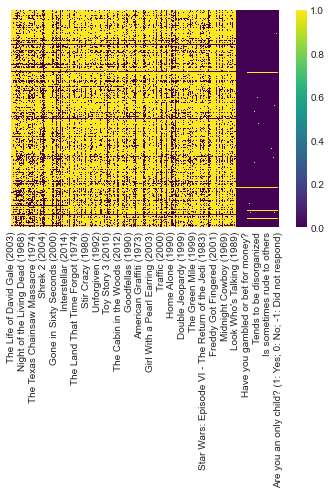

In [4]:
# Checking the Missing Values

sns.heatmap(df.isnull(), yticklabels=False, cmap= "viridis")

In [5]:
###. Printing the Columns with missing values

for col_name in df.columns: 
    print ("column:",col_name,".Missing:",sum(df[col_name].isnull()))

column: The Life of David Gale (2003) .Missing: 1021
column: Wing Commander (1999) .Missing: 1026
column: Django Unchained (2012) .Missing: 644
column: Alien (1979) .Missing: 808
column: Indiana Jones and the Last Crusade (1989) .Missing: 634
column: Snatch (2000) .Missing: 969
column: Rambo: First Blood Part II (1985) .Missing: 915
column: Fargo (1996) .Missing: 843
column: Let the Right One In (2008) .Missing: 960
column: Black Swan (2010) .Missing: 509
column: King Kong (1976) .Missing: 693
column: The Machinist (2004) .Missing: 950
column: A Nightmare on Elm Street (1984) .Missing: 697
column: Brazil (1985) .Missing: 1006
column: The Fast and the Furious (2001) .Missing: 525
column: Change of Habit (1969) .Missing: 1021
column: American Beauty (1999) .Missing: 713
column: Psycho (1960) .Missing: 740
column: Terminator 3: Rise of the Machines (2003) .Missing: 727
column: Night of the Living Dead (1968) .Missing: 910
column: Man on Fire (2004) .Missing: 957
column: Star Wars: Episode

In [6]:
### Filling the missing values

row = df.mean(axis = 1)
col = df.mean(axis = 0)

for i in range(len(df)):
    for j in range(len(df.columns)):
        if np.isnan(df.iloc[i,j]):
            df.iloc[i,j] = (row[i] + col[j])/2

In [7]:
### Making a copy of imputed data 
data = df.copy()


### EDA of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Columns: 477 entries, The Life of David Gale (2003) to Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
dtypes: float64(475), int64(2)
memory usage: 4.0 MB


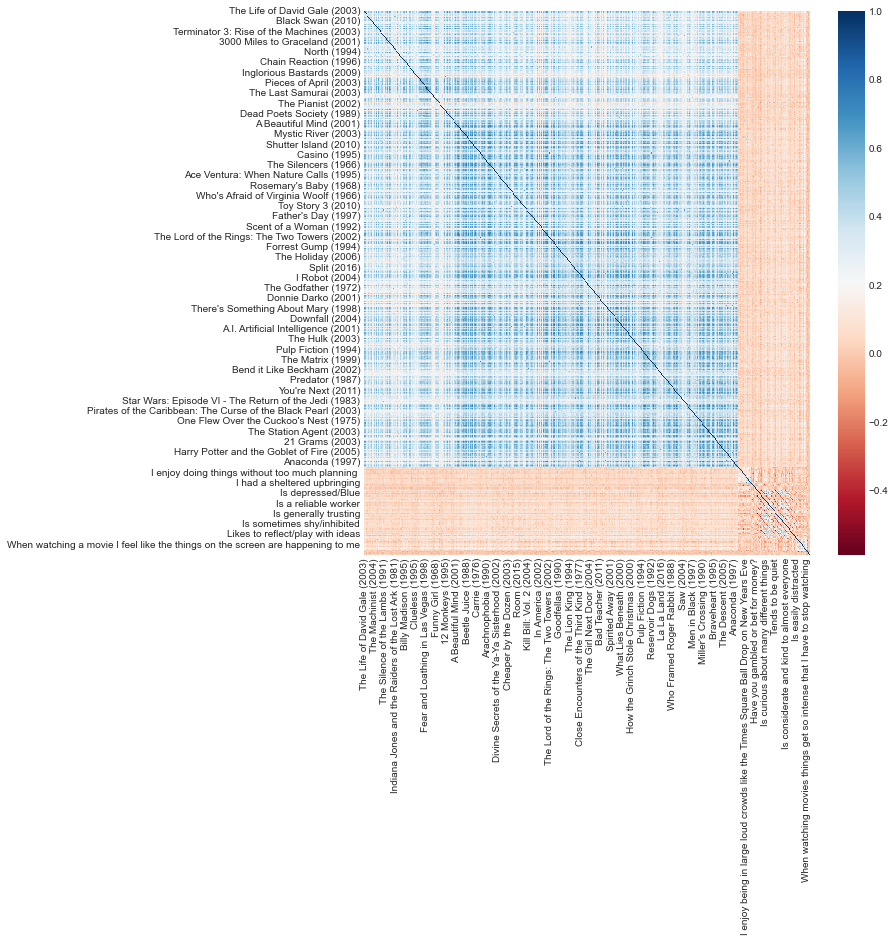

In [8]:
#Building the Confusion Matrix (Bi-Varaite Analysis)

correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=False, cmap= 'RdBu')
plt.show()

In [9]:
### Final Overview of data set
df.head()

The Life of David Gale (2003)  Wing Commander (1999)  \
0                       2.531137               2.466043   
1                       2.535254               2.470159   
2                       2.635754               2.570660   
3                       2.468740               2.403645   
4                       2.379504               2.314410   

   Django Unchained (2012)  Alien (1979)  \
0                 4.000000      2.809286   
1                 1.500000      2.813402   
2                 3.136807      2.913902   
3                 2.000000      2.746888   
4                 3.500000      2.657652   

   Indiana Jones and the Last Crusade (1989)  Snatch (2000)  \
0                                   3.000000       2.754308   
1                                   2.848905       2.758424   
2                                   2.949405       2.858924   
3                                   3.000000       2.691910   
4                                   0.500000       2.602674   

   Rambo: First Blood Part II (1985)  Fargo (1996)  \
0                           2.638172      2.905283   
1                           2.642288      2.909399   
2                           2.742788      3.009899   
3                           2.575774      2.842885   
4                           0.500000      1.000000   

   Let the Right One In (2008)  Black Swan (2010)  ...  \
0                     2.703655           2.911262  ...   
1                     2.707771           2.915378  ...   
2                     2.808271           3.015878  ...   
3                     2.641257           4.000000  ...   
4                     2.552021           0.000000  ...   

   When watching a movie I cheer or shout or talk or curse at the screen  \
0                                                1.0                       
1                                                3.0                       
2                                                5.0                       
3                                                3.0                       
4                                                2.0                       

   When watching a movie I feel like the things on the screen are happening to me  \
0                                                6.0                                
1                                                1.0                                
2                                                4.0                                
3                                                1.0                                
4                                                3.0                                

   As a movie unfolds I start to have problems keeping track of events that happened earlier  \
0                                                2.0                                           
1                                                1.0                                           
2                                                3.0                                           
3                                                1.0                                           
4                                                2.0                                           

   The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared  \
0                                                5.0                                                                                                         
1                                                6.0                                                                                                         
2                                                5.0                                                                                                         
3                                                4.0                                                                                                     

# PART 1

##### model building 

In [110]:
cod_ = {}

l = 1

for movie in df.columns:
    print ('current movie:'+str(l)+''+movie )
    cod_[movie] = [0 , '', '',0,0]
    cod_min = np.inf
    cod_max = -np.inf
    for other in df.columns[df.columns != movie]:
        reg = LinearRegression().fit(df[[other]],df[[movie]])
        cod = reg.score(df[[other]], df[[movie]])
        if cod < cod_min:
            cod_[movie][1] = other 
            cod_min = cod
        if cod > cod_max:
            cod_[movie][2] = other
            cod_max = cod
        cod_[movie][0] += cod
    cod_[movie][0]/= len(df.columns[df.columns != movie])
    cod_[movie][3] = cod_min
    cod_[movie][4] = cod_max
    l+= 1

current movie:1The Life of David Gale (2003)
current movie:2Wing Commander (1999)
current movie:3Django Unchained (2012)
current movie:4Alien (1979)
current movie:5Indiana Jones and the Last Crusade (1989)
current movie:6Snatch (2000)
current movie:7Rambo: First Blood Part II (1985)
current movie:8Fargo (1996)
current movie:9Let the Right One In (2008)
current movie:10Black Swan (2010)
current movie:11King Kong (1976)
current movie:12The Machinist (2004)
current movie:13A Nightmare on Elm Street (1984)
current movie:14Brazil (1985)
current movie:15The Fast and the Furious (2001)
current movie:16Change of Habit (1969)
current movie:17American Beauty (1999)
current movie:18Psycho (1960)
current movie:19Terminator 3: Rise of the Machines (2003)
current movie:20Night of the Living Dead (1968)
current movie:21Man on Fire (2004)
current movie:22Star Wars: Episode IV - A New Hope (1977)
current movie:23The Silence of the Lambs (1991)
current movie:24The Others (2001)
current movie:25Minority 

current movie:204Erik the Viking (1989)
current movie:205Pirates of the Caribbean: At World's End (2007)
current movie:206The Ring (2002)
current movie:207The Truman Show (1998)
current movie:208Forrest Gump (1994)
current movie:209I.Q. (1994)
current movie:210Goodfellas (1990)
current movie:211Uptown Girls (2003)
current movie:212Beauty and the Beauty (1991)
current movie:213Black Hawk Down (2001)
current movie:214Knight and Day (2010)
current movie:215The Shawshank Redemption (1994)
current movie:216Sleepy Hollow (1999)
current movie:217The Holiday (2006)
current movie:218Sixteen Candles (1984)
current movie:21910000 BC (2008)
current movie:220Austin Powers: The Spy Who Shagged Me (1999)
current movie:221The Lion King (1994)
current movie:222Child's Play (1988)
current movie:223Anger Management (2002)
current movie:224Angels in the Outfield (1994)
current movie:225Wild Wild West (1999)
current movie:226Split (2016)
current movie:227Bad Boys (1995)
current movie:228The Prestige (2006)

current movie:407Have you ever been rock climbing?
current movie:408I enjoy being in large loud crowds like the Times Square Ball Drop on New Years Eve
current movie:409I enjoy going to large music or dance festivals 
current movie:410I enjoy watching horror movies
current movie:411No risk - No fun
current movie:412I like to be surprised even if it startles or scares me
current movie:413Have you ever parachuted?
current movie:414I enjoy haunted houses
current movie:415I had a sheltered upbringing
current movie:416My life is very stressful
current movie:417I value my life to be well ordered and predictable
current movie:418Have you ridden a motorcycle?
current movie:419Have you gambled or bet for money?
current movie:420Have you ever been sky-diving?
current movie:421Is talkative
current movie:422Tends to find fault with others
current movie:423Does a thorough job
current movie:424Is depressed/Blue
current movie:425Is original/comes up with new ideas
current movie:426Is reserved
current

##### movies and thier best predictors

In [142]:
best_movies = {}

for movie in df.columns[:400]:
    best_movies[movie] = cod_[movie][2]
    
best_df = pd.DataFrame(best_movies.items(), columns = ['movies','best_prdictor'])
    
best_df

movies  \
0                The Life of David Gale (2003)   
1                        Wing Commander (1999)   
2                      Django Unchained (2012)   
3                                 Alien (1979)   
4    Indiana Jones and the Last Crusade (1989)   
..                                         ...   
395                              Patton (1970)   
396                            Anaconda (1997)   
397                             Twister (1996)   
398                           MacArthur (1977)   
399                  Look Who's Talking (1989)   

                                   best_prdictor  
0              The King of Marvin Gardens (1972)  
1                               From Hell (2001)  
2                     Inglorious Bastards (2009)  
3                                  Aliens (1986)  
4    Indiana Jones and the Temple of Doom (1984)  
..                                           ...  
395                           The Lookout (2007)  
396                           The Lookout (2007)  
397                            Sexy Beast (2000)  
398                     Miller's Crossing (1990)  
399                                   Ran (1985)  

[400 rows x 2 columns]

#### average COD 

In [197]:
average_cod = {}

for movie in df.columns[:400]:
    average_cod[movie] = cod_[movie][0]
    
average_cod_df = pd.DataFrame(average_cod.items(), columns = ['movies','average_cod'])

for m in average_cod_df.movies:
    average_cod_df.loc[average_cod_df['movies'] == m, 'best_predictor'] = best_movies[m]
    


average_cod_df

movies  average_cod  \
0                The Life of David Gale (2003)     0.180722   
1                        Wing Commander (1999)     0.172390   
2                      Django Unchained (2012)     0.070142   
3                                 Alien (1979)     0.082184   
4    Indiana Jones and the Last Crusade (1989)     0.065456   
..                                         ...          ...   
395                              Patton (1970)     0.219320   
396                            Anaconda (1997)     0.085255   
397                             Twister (1996)     0.142881   
398                           MacArthur (1977)     0.200916   
399                  Look Who's Talking (1989)     0.139516   

                                  best_predictor  
0              The King of Marvin Gardens (1972)  
1                               From Hell (2001)  
2                     Inglorious Bastards (2009)  
3                                  Aliens (1986)  
4    Indiana Jones and the Temple of Doom (1984)  
..                                           ...  
395                           The Lookout (2007)  
396                           The Lookout (2007)  
397                            Sexy Beast (2000)  
398                     Miller's Crossing (1990)  
399                                   Ran (1985)  

[400 rows x 3 columns]

<AxesSubplot:xlabel='movies'>

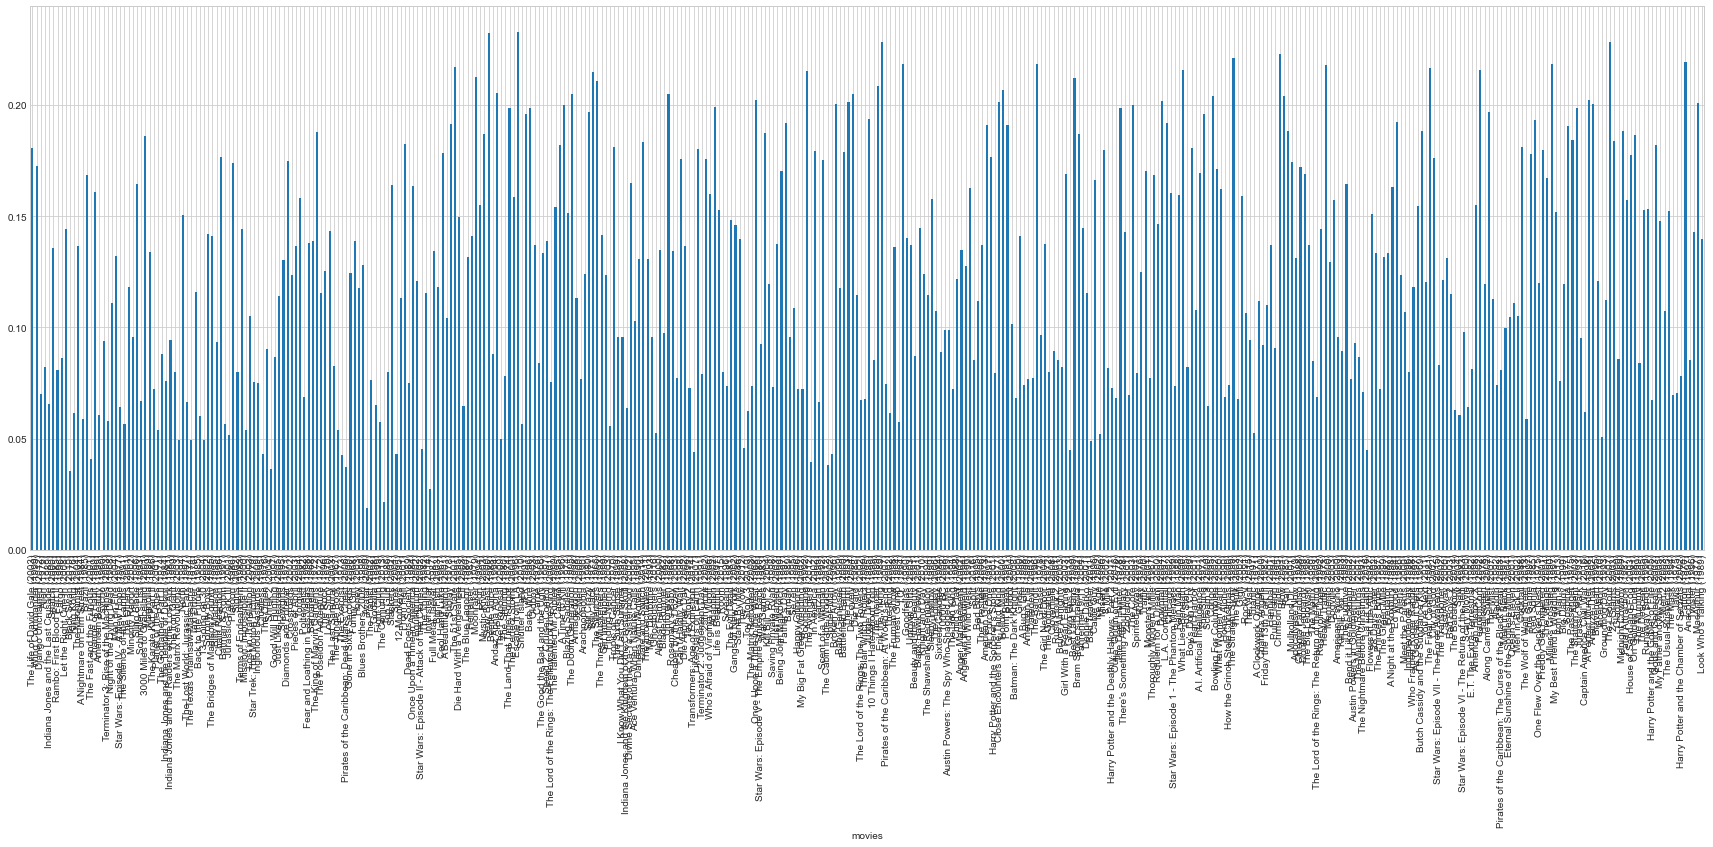

In [146]:
#### Histogram of Average COD

average_cod_df.set_index("movies")['average_cod'].plot(kind='bar',figsize=(30, 10))

###### Easiest to predict

In [130]:
easy_pred = {}

for movie in df.columns[:400]:
    easy_pred[movie] = cod_[movie][-1]
    
easy_pred_df = pd.DataFrame(easy_pred.items(), columns = ['movies','max_cod']).sort_values('max_cod', ascending = False)[:10]

for m in easy_pred_df.movies:
    easy_pred_df.loc[easy_pred_df['movies'] == m, 'best_predictor'] = best_movies[m]
    
easy_pred_df



movies   max_cod             best_predictor
203     Erik the Viking (1989)  0.680359                I.Q. (1994)
208                I.Q. (1994)  0.680359     Erik the Viking (1989)
377         The Lookout (2007)  0.658955              Patton (1970)
395              Patton (1970)  0.658955         The Lookout (2007)
282               Congo (1995)  0.656521  The Straight Story (1999)
287  The Straight Story (1999)  0.656521               Congo (1995)
240          The Bandit (1996)  0.652789     Best Laid Plans (1999)
249     Best Laid Plans (1999)  0.652789          The Bandit (1996)
309       Heavy Traffic (1973)  0.647819                 Ran (1985)
300                 Ran (1985)  0.647819       Heavy Traffic (1973)

<AxesSubplot:xlabel='movies'>

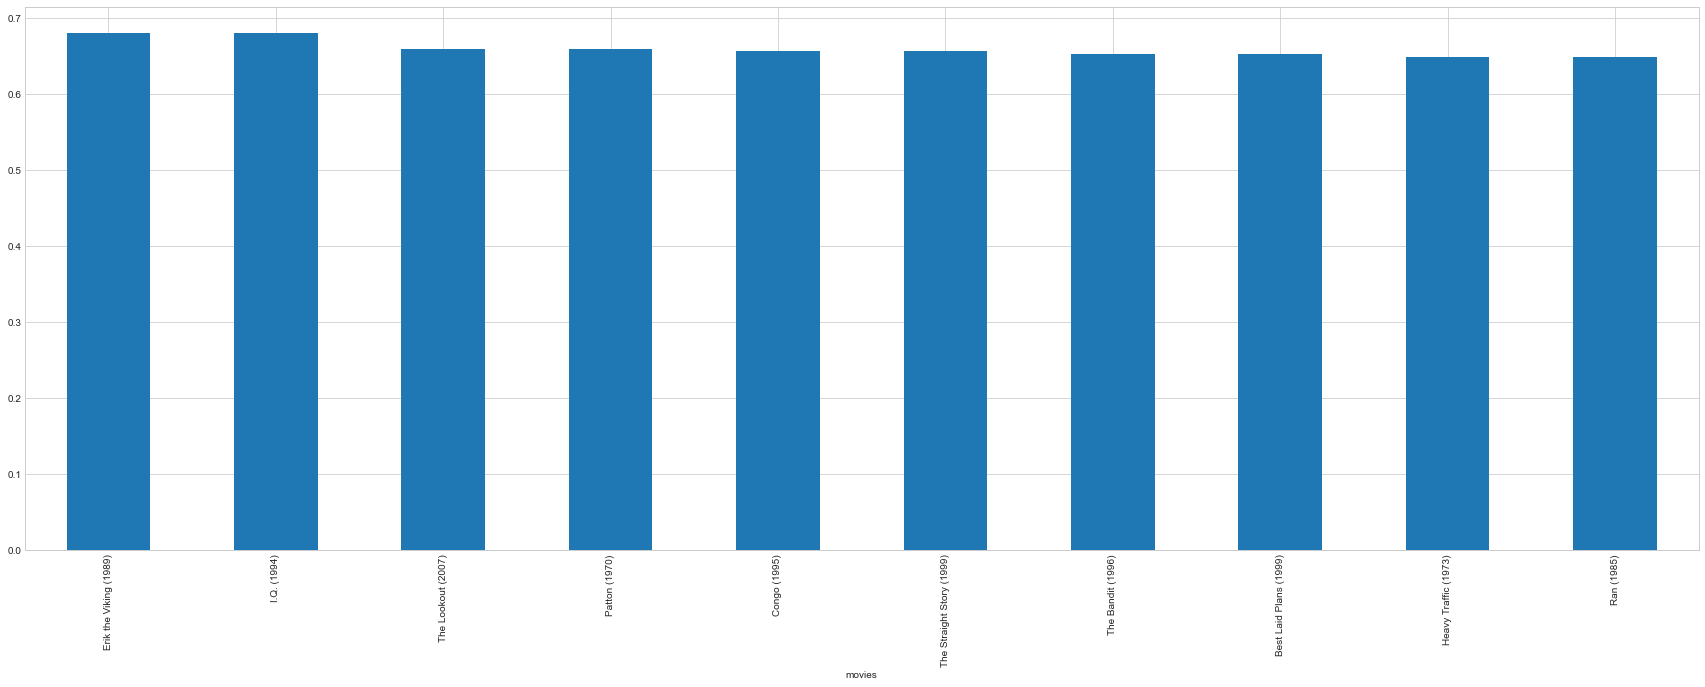

In [145]:
#### Histogram of easiet to predict

easy_pred_df.set_index("movies")['max_cod'].plot(kind='bar',figsize=(30, 10))

##### Hardest to predict

In [139]:
hard_pred = {}

for movie in df.columns[:400]:
    hard_pred[movie] = cod_[movie][-1]
    
hard_pred_df = pd.DataFrame(easy_pred.items(), columns = ['movies','max_cod']).sort_values('max_cod', ascending = True)[:10]

for m in hard_pred_df.movies:
    hard_pred_df.loc[hard_pred_df['movies'] == m, 'best_predictor'] = best_movies[m]
    
hard_pred_df



movies   max_cod  \
80                    Avatar (2009)  0.067887   
95              Interstellar (2014)  0.081612   
9                 Black Swan (2010)  0.094861   
319               La La Land (2016)  0.110207   
55                  Clueless (1995)  0.110905   
190   The Cabin in the Woods (2012)  0.115476   
248              Grown Ups 2 (2013)  0.123269   
40        Back to the Future (1985)  0.129831   
357  The Wolf of Wall Street (2013)  0.132793   
30        Planet of the Apes (2001)  0.134899   

                                        best_predictor  
80   Pirates of the Caribbean: Dead Man's Chest (2006)  
95                                       Torque (2004)  
9                   Once Upon a Time in America (1984)  
319                                 The Lookout (2007)  
55                                   Love Story (1970)  
190                               The Evil Dead (1981)  
248                              Knight and Day (2010)  
40                      3000 Miles to Graceland (2001)  
357                                     Memento (2000)  
30                                  Equilibrium (2002)

<AxesSubplot:xlabel='movies'>

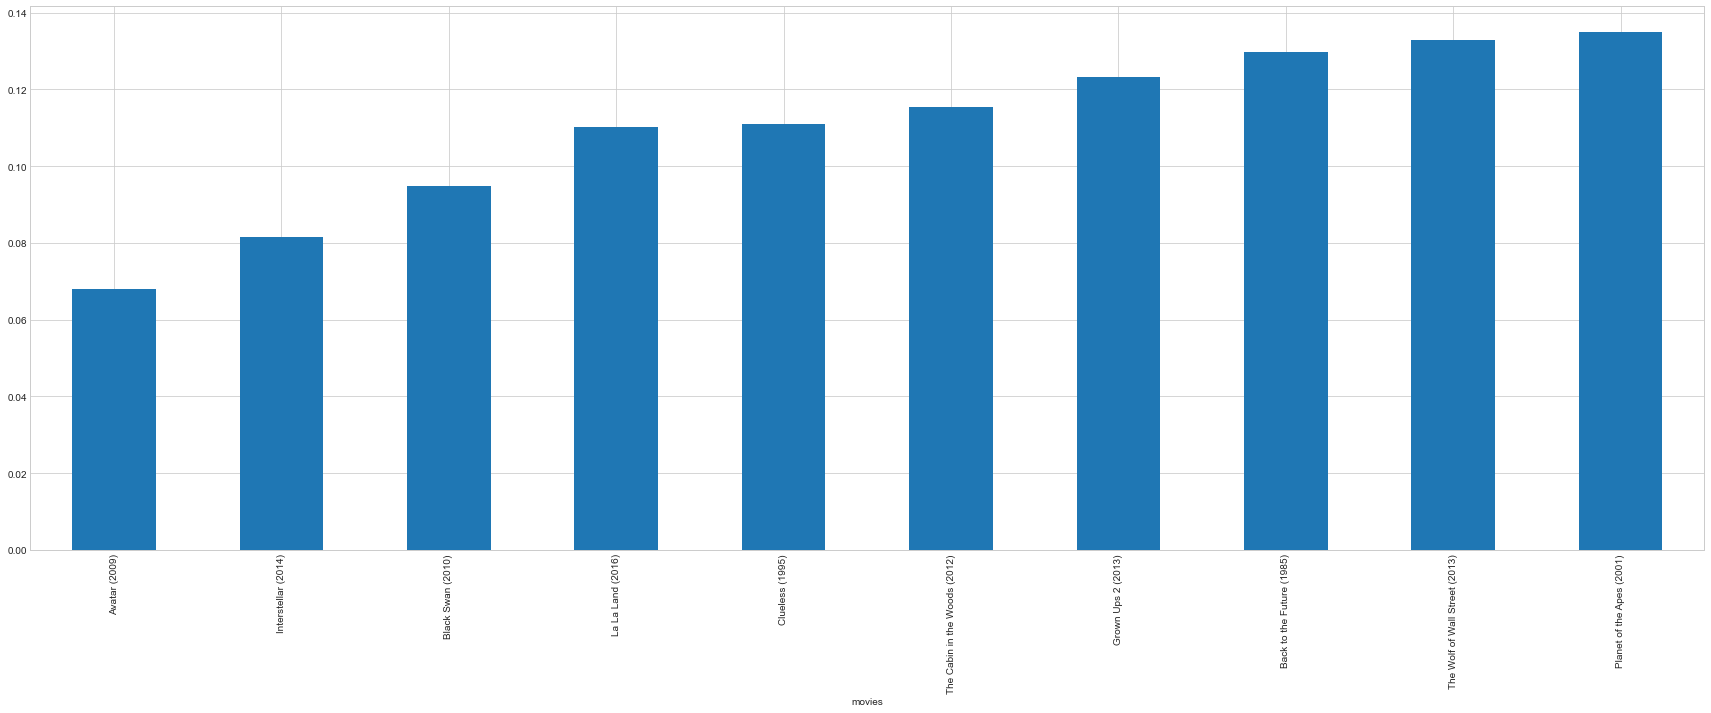

In [144]:
#### Histogram of hardest to predict

hard_pred_df.set_index("movies")['max_cod'].plot(kind='bar',figsize=(30, 10))

# PART 2

#### Top 10 best predicted along with the worst predicted ones

In [201]:
frames = [easy_pred_df, hard_pred_df]

In [202]:
### CONCATINATING

df2 = pd.concat(frames)

#removing irrelevant column's
df2.drop(['best_predictor'],axis=1,inplace=True)

###### Making a table

In [203]:
### Visualizing the Table

df2

movies   max_cod
203          Erik the Viking (1989)  0.680359
208                     I.Q. (1994)  0.680359
377              The Lookout (2007)  0.658955
395                   Patton (1970)  0.658955
282                    Congo (1995)  0.656521
287       The Straight Story (1999)  0.656521
240               The Bandit (1996)  0.652789
249          Best Laid Plans (1999)  0.652789
309            Heavy Traffic (1973)  0.647819
300                      Ran (1985)  0.647819
80                    Avatar (2009)  0.067887
95              Interstellar (2014)  0.081612
9                 Black Swan (2010)  0.094861
319               La La Land (2016)  0.110207
55                  Clueless (1995)  0.110905
190   The Cabin in the Woods (2012)  0.115476
248              Grown Ups 2 (2013)  0.123269
40        Back to the Future (1985)  0.129831
357  The Wolf of Wall Street (2013)  0.132793
30        Planet of the Apes (2001)  0.134899

##### best predictors for 475,476,477

In [204]:
best = {}

for movie in df.columns[474:477]:
    best[movie] = cod_[movie][2]
    
best_d = pd.DataFrame(best.items(), columns = ['movies','best_prdictor'])
    
best_d

movies  \
0  Gender identity (1 = female; 2 = male; 3 = sel...   
1  Are you an only child? (1: Yes; 0: No; -1: Did...   
2  Movies are best enjoyed alone (1: Yes; 0: No; ...   

                                       best_prdictor  
0                        I have cried during a movie  
1  Movies are best enjoyed alone (1: Yes; 0: No; ...  
2  Are you an only child? (1: Yes; 0: No; -1: Did...

In [240]:
#### Defing the Predictor according to the instructions given

X = df[['Erik the Viking (1989)','I.Q. (1994)','The Lookout (2007)','Patton (1970)','Congo (1995)',
         'The Straight Story (1999)','The Bandit (1996)','Best Laid Plans (1999)','Heavy Traffic (1973)',
         'Ran (1985)','Avatar (2009)','Interstellar (2014)','Black Swan (2010)',
         'La La Land (2016)','Clueless (1995)','The Cabin in the Woods (2012)','Grown Ups 2 (2013)','Back to the Future (1985)',
         'The Wolf of Wall Street (2013)','Planet of the Apes (2001)']]


In [241]:
X = df[['Gender identity (1 = female; 2 = male; 3 = self-described)','Are you an only child? (1: Yes; 0: No; -1: Did not respond)','Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)','I have cried during a movie']]



In [242]:
#####. printing the names of all the df columns

data.columns

Index(['The Life of David Gale (2003)', 'Wing Commander (1999)',
       'Django Unchained (2012)', 'Alien (1979)',
       'Indiana Jones and the Last Crusade (1989)', 'Snatch (2000)',
       'Rambo: First Blood Part II (1985)', 'Fargo (1996)',
       'Let the Right One In (2008)', 'Black Swan (2010)',
       ...
       'When watching a movie I cheer or shout or talk or curse at the screen',
       'When watching a movie I feel like the things on the screen are happening to me',
       'As a movie unfolds I start to have problems keeping track of events that happened earlier',
       'The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared',
       'When watching a movie I get completely immersed in the alternative reality of the film',
       'Movies change my position on social economic or political issues',
       'When watching movies things get so intense that I have to stop watching',
 

In [243]:
def reg_proc(label):
    #y = countries[label]
    
    ### Linear regression

    regressor = LinearRegression()
    regressor.fit(X, y)
    
    ### COD Calculation

    y_pred = regressor.score(X, y)        
    return(y_pred)

In [244]:
### Model Training 

pred_df2 = pd.DataFrame({lab: reg_proc(lab) for lab in y.columns}, 
                       columns = y.columns, index=[0])

##### Scatter plot of old and New R Sqaure values

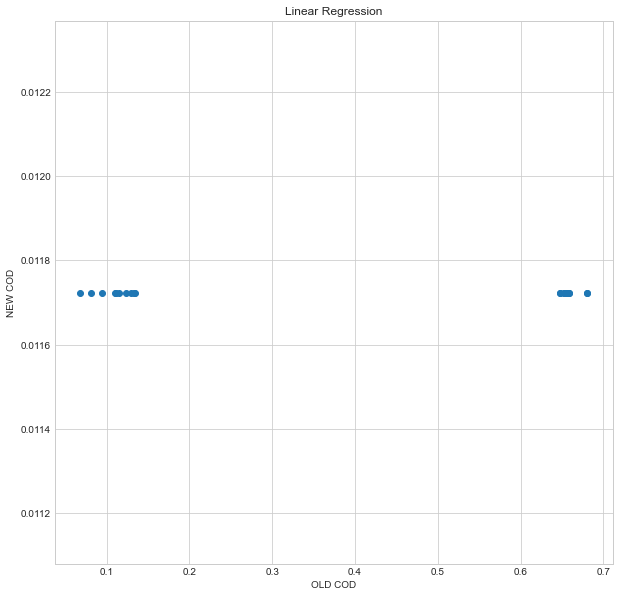

In [238]:
# Assigning x and y values
x = df2.set_index("movies")
y = pred_df2.T

plt.figure(figsize=(10,10))
plt.scatter(x, y)


# To show the plot
plt.title("Linear Regression")
plt.xlabel("OLD COD")
plt.ylabel("NEW COD")

# Show plot

plt.show(LinearRegression)


Scatter plots of Old R square vs New R square are one of the richest form of data visualization. You can tell pretty much everything from it. Ideally, all your points should be close to a mean position grid line. So, if the old R2 is 0.5, our New R2 should be reasonably close to 0.5 to our model had a high R Square, all the points would be close to mean line. The lower the R Square, the weaker the Goodness of fit of our model, the more foggy or dispersed your points are.

we can see that our model seems to be performing insignificantly and values are far from the mean showing the uncorrelated behaviour.

# PART 3

In [169]:
# skip the Na values while finding the median
average_cod_df.median(axis = 1, skipna = True)

0      0.180722
1      0.172390
2      0.070142
3      0.082184
4      0.065456
         ...   
395    0.219320
396    0.085255
397    0.142881
398    0.200916
399    0.139516
Length: 400, dtype: float64

In [170]:
### Printing the COD Median

average_cod_df.median()

average_cod    0.121019
dtype: float64

In [173]:
### picking the middle 30 movies of the COD Range
pd.DataFrame(average_cod_df.iloc[185:215 , :])

movies  average_cod
185                                 Boomerang (1992)     0.215381
186                              The Avengers (2012)     0.039717
187                                In America (2002)     0.179059
188                                    Tarzan (1999)     0.066301
189                          Scent of a Woman (1992)     0.175133
190                    The Cabin in the Woods (2012)     0.038165
191                                Spider-Man (2002)     0.043112
192                              Broken Arrow (1996)     0.200308
193                             Baby Geniuses (1999)     0.117721
194                         Battlefield Earth (2000)     0.178911
195                                  The Firm (1993)     0.201203
196                                 De-Lovely (2004)     0.204916
197                                  Die Hard (1988)     0.114522
198     The Lord of the Rings: The Two Towers (2002)     0.067480
199                   The Blair Witch Project (1999)     0.067690
200                               Judge Dredd (1995)     0.193806
201                10 Things I Hate About You (1999)     0.085523
202                               The Insider (1999)     0.208650
203                           Erik the Viking (1989)     0.228313
204  Pirates of the Caribbean: At World's End (2007)     0.074545
205                                  The Ring (2002)     0.061615
206                           The Truman Show (1998)     0.136094
207                              Forrest Gump (1994)     0.057648
208                                      I.Q. (1994)     0.218240
209                                Goodfellas (1990)     0.140325
210                              Uptown Girls (2003)     0.137113
211                     Beauty and the Beauty (1991)     0.086984
212                           Black Hawk Down (2001)     0.144536
213                            Knight and Day (2010)     0.123790
214                  The Shawshank Redemption (1994)     0.114391

In [174]:
### Randomly picking the 10 samples
average_cod_df.sample(10)

movies  average_cod
55             Clueless (1995)     0.043310
346          FeardotCom (2002)     0.215655
303     Cinema Paradiso (1988)     0.172246
119           Barb Wire (1996)     0.198748
220       The Lion King (1994)     0.072161
64               Torque (2004)     0.158035
98       Cool Hand Luke (1967)     0.178458
287  The Straight Story (1999)     0.221242
10            King Kong (1976)     0.061672
200         Judge Dredd (1995)     0.193806

In [175]:
### Deifing the X and Y axis

y = data[['Boomerang (1992)','The Avengers (2012)','In America (2002)','Tarzan (1999)','Scent of a Woman (1992)',
'The Cabin in the Woods (2012)','Spider-Man (2002)','Broken Arrow (1996)','Baby Geniuses (1999)',
'Battlefield Earth (2000)','War Games (1983)','The Firm (1993)','De-Lovely (2004)','Die Hard (1988)','The Lord of the Rings: The Two Towers (2002)',
'The Blair Witch Project (1999)','Judge Dredd (1995)','10 Things I Hate About You (1999)','The Insider (1999)',
'Erik the Viking (1989)','The Ring (2002)','The Truman Show (1998)','Forrest Gump (1994)','I.Q. (1994)',
'Goodfellas (1990)','Uptown Girls (2003)', 'Beauty and the Beauty (1991)','Black Hawk Down (2001)',
'Knight and Day (2010)','The Shawshank Redemption (1994)']]

X = data[['A Perfect Murder (1998)','Grease (1978)','Home Alone (1990)','I Robot (2004)','Bad Boys (1995)',
         'Requiem for a Dream (2000)','Men in Black (1997)','Lost in Translation (2003)','Baby Geniuses (1999)',
         'Memento (2000)']]



In [176]:
#import the SK learn library for 80:20 spilit

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

##### Building the Hypertuned Ridge regression model 

In [177]:
## 
def reg_proc(label):
    #y = countries[label]
    model = Ridge()
    # define model evaluation method
    cv = RepeatedKFold(n_splits=2, n_repeats=3, random_state=1)
    # define grid
    grid = dict()
    grid['alpha'] = arange(0, 1, 0.01)
    # define search
    search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # perform the search
    results = search.fit(X_train, y_train)

    
    score = search.score(X_train, y_train) 
    
    #y_pred = search.predict(X_test)
    
    
    return(score)

In [178]:
### MOdel trainging

pred_df3 = pd.DataFrame({lab: reg_proc(lab) for lab in y.columns}, 
                       columns = y.columns, index=[0])

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

For a regression with an intercept, 𝑅2 is between 0 and 1, and from its definition 𝑅2=1−𝑆𝑆𝐸/𝑇𝑆𝑆 we can find an interpretation: 
𝑆𝑆𝐸/𝑇𝑆𝑆 is the sum of squared errors divided by the total sum of squares, so it is the fraction ot the total sum of squares that is contained in the error term.

So one minus this is the fraction of the total sum of squares that is not in the error, so taking the root will give us the RMSE value

In [179]:
#### Calculating the Root Mean Square Value

df3 = pred_df3.T

add = 1-df3[0]

df3["RMSE"] = add
df3.rename(columns = { 0 :'COD'}, inplace = True)

In [180]:
### Printnig the table

df3

COD      RMSE
Boomerang (1992)                             -0.264803  1.264803
The Avengers (2012)                          -0.264803  1.264803
In America (2002)                            -0.264803  1.264803
Tarzan (1999)                                -0.264803  1.264803
Scent of a Woman (1992)                      -0.264803  1.264803
The Cabin in the Woods (2012)                -0.264803  1.264803
Spider-Man (2002)                            -0.264803  1.264803
Broken Arrow (1996)                          -0.264803  1.264803
Baby Geniuses (1999)                         -0.264803  1.264803
Battlefield Earth (2000)                     -0.264803  1.264803
War Games (1983)                             -0.264803  1.264803
The Firm (1993)                              -0.264803  1.264803
De-Lovely (2004)                             -0.264803  1.264803
Die Hard (1988)                              -0.264803  1.264803
The Lord of the Rings: The Two Towers (2002) -0.264803  1.264803
The Blair Witch Project (1999)               -0.264803  1.264803
Judge Dredd (1995)                           -0.264803  1.264803
10 Things I Hate About You (1999)            -0.264803  1.264803
The Insider (1999)                           -0.264803  1.264803
Erik the Viking (1989)                       -0.264803  1.264803
The Ring (2002)                              -0.264803  1.264803
The Truman Show (1998)                       -0.264803  1.264803
Forrest Gump (1994)                          -0.264803  1.264803
I.Q. (1994)                                  -0.264803  1.264803
Goodfellas (1990)                            -0.264803  1.264803
Uptown Girls (2003)                          -0.264803  1.264803
Beauty and the Beauty (1991)                 -0.264803  1.264803
Black Hawk Down (2001)                       -0.264803  1.264803
Knight and Day (2010)                        -0.264803  1.264803
The Shawshank Redemption (1994)              -0.264803  1.264803

The results of rigde regression after the 100 fits comes out to be in negative value, however the range of R sqaure (COD) is always in the range of 0 - 1 but negative here proving that the in sample prediction feature of rigde regression is not suitable of our data set.

# PART 4

#### Making the Hypertuned Lasso Regression Model

In [181]:

def reg_proc(label):
    #y = countries[label]
    model = Lasso()
    # define model evaluation method
    cv = RepeatedKFold(n_splits=2, n_repeats=3, random_state=1)
    # define grid
    grid = dict()
    grid['alpha'] = arange(0, 1, 0.01)
    # define search
    search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # perform the search
    results = search.fit(X_train, y_train)

    
    score = search.score(X_train, y_train) 
    
    
    return(score)

In [182]:
### Training the model 
pred_df4 = pd.DataFrame({lab: reg_proc(lab) for lab in y.columns}, 
                       columns = y.columns, index=[0])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/ana

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.187e+02, tolerance: 2.654e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.421e+01, tolerance: 1.178e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.581e+01, tolerance: 8.533e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.592e+01, tolerance: 1.536e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/ana

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.275e+01, tolerance: 1.949e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.393e+01, tolerance: 2.076e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.423e+01, tolerance: 2.257e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.333e+01, tolerance: 4.426e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.311e+01, tolerance: 1.058e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.581e+01, tolerance: 8.533e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.608e+01, tolerance: 2.095e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.310e+00, tolerance: 2.049e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_des

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.604e+01, tolerance: 1.502e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.393e+01, tolerance: 2.076e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.489e+01, tolerance: 1.772e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.902e+01, tolerance: 1.407e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.271e+01, tolerance: 1.626e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.208e+02, tolerance: 2.669e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_pa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.335e+01, tolerance: 1.975e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.423e+01, tolerance: 2.257e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/ana

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.581e+01, tolerance: 8.533e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.275e+01, tolerance: 1.949e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/ana

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.671e+01, tolerance: 1.368e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.330e+01, tolerance: 2.028e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_pa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.379e+01, tolerance: 8.954e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.201e+01, tolerance: 2.173e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/ana

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.029e+00, tolerance: 3.934e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.277e+01, tolerance: 6.569e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.044e+01, tolerance: 7.579e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.168e+01, tolerance: 7.174e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.208e+01, tolerance: 3.549e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.098e+00, tolerance: 2.924e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/ana

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.592e+01, tolerance: 1.536e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.341e+01, tolerance: 1.325e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/ana

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.489e+01, tolerance: 1.772e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.423e+01, tolerance: 2.257e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/ana

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.690e+01, tolerance: 1.009e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.735e+01, tolerance: 1.757e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_pa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.592e+01, tolerance: 1.536e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.134e+01, tolerance: 5.599e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_pa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.663e+01, tolerance: 2.301e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.688e+01, tolerance: 2.370e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_des

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+01, tolerance: 8.064e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.275e+01, tolerance: 1.949e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.122e+01, tolerance: 2.124e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.721e+01, tolerance: 8.953e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_pa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.479e+01, tolerance: 1.221e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.595e+01, tolerance: 9.233e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/ana

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.542e+01, tolerance: 2.374e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.740e+01, tolerance: 1.649e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/ana

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.496e+01, tolerance: 1.989e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.122e+01, tolerance: 2.124e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_pa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.721e+01, tolerance: 8.953e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.393e+01, tolerance: 2.076e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.892e+01, tolerance: 1.702e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.735e+01, tolerance: 1.757e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/ana

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.310e+00, tolerance: 2.049e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.650e+01, tolerance: 6.889e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_pa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.311e+01, tolerance: 1.058e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.310e+00, tolerance: 2.049e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_des

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.924e+01, tolerance: 2.006e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.721e+01, tolerance: 8.953e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/ana

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.448e+01, tolerance: 1.665e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.208e+01, tolerance: 3.549e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

In [183]:
#### making the performance grapgh of Lasso (Extra)
from sklearn.model_selection import cross_val_score
alpha_space = np.logspace(-4, 0, 30)   
# Checking for alpha from .0001 to 1 and finding the best value for alpha
alpha_space
lasso_scores = []
lasso = Lasso(normalize = True)
for alpha in alpha_space:
    lasso.alpha = alpha
    val = np.mean(cross_val_score(lasso, X_train, y_train, cv = 10))
    lasso_scores.append(val)

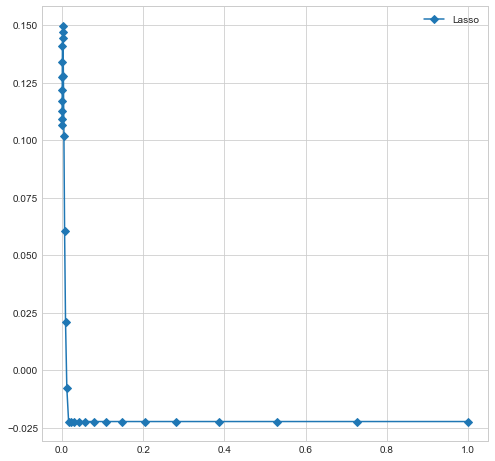

In [184]:
### Plotting 
plt.figure(figsize=(8, 8))
plt.plot(alpha_space, lasso_scores, marker = 'D', label = "Lasso")
plt.legend()
plt.show()

In [185]:
# Performing GridSearchCV with Cross Validation technique on Lasso Regression and finding the optimum value of alpha

params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
lasso = Lasso(normalize=True)
lasso_model = GridSearchCV(lasso, params, cv = 10)
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 0.0014849682622544665}
0.14902680239917748


In [186]:
### Results printing  of Lasso
pd.DataFrame(lasso_model.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

mean_test_score  std_test_score                             params
0          0.098787        0.238596                   {'alpha': 1e-08}
1          0.098787        0.238595  {'alpha': 1.4508287784959402e-08}
2          0.098788        0.238595   {'alpha': 2.104904144512022e-08}
3          0.098789        0.238594   {'alpha': 3.053855508833412e-08}
4          0.098790        0.238593  {'alpha': 4.4306214575838774e-08}
..              ...             ...                                ...
95        -0.022345        0.025010       {'alpha': 22570197.19633926}
96        -0.022345        0.025010      {'alpha': 32745491.628777318}
97        -0.022345        0.025010      {'alpha': 47508101.621028125}
98        -0.022345        0.025010       {'alpha': 68926121.04349709}
99        -0.022345        0.025010             {'alpha': 100000000.0}

[100 rows x 3 columns]

In [187]:
#### Calcuting the RMSE for the Hypertuned Lasso Regression

df4 = pred_df4.T

add = 1-df4[0]

df4["RMSE"] = add
df4.rename(columns = { 0 :'COD'}, inplace = True)

In [188]:
#### Pirinting the Final table

df4

COD      RMSE
Boomerang (1992)                             -0.262929  1.262929
The Avengers (2012)                          -0.262929  1.262929
In America (2002)                            -0.262929  1.262929
Tarzan (1999)                                -0.262929  1.262929
Scent of a Woman (1992)                      -0.262929  1.262929
The Cabin in the Woods (2012)                -0.262929  1.262929
Spider-Man (2002)                            -0.262929  1.262929
Broken Arrow (1996)                          -0.262929  1.262929
Baby Geniuses (1999)                         -0.262929  1.262929
Battlefield Earth (2000)                     -0.262929  1.262929
War Games (1983)                             -0.262929  1.262929
The Firm (1993)                              -0.262929  1.262929
De-Lovely (2004)                             -0.262929  1.262929
Die Hard (1988)                              -0.262929  1.262929
The Lord of the Rings: The Two Towers (2002) -0.262929  1.262929
The Blair Witch Project (1999)               -0.262929  1.262929
Judge Dredd (1995)                           -0.262929  1.262929
10 Things I Hate About You (1999)            -0.262929  1.262929
The Insider (1999)                           -0.262929  1.262929
Erik the Viking (1989)                       -0.262929  1.262929
The Ring (2002)                              -0.262929  1.262929
The Truman Show (1998)                       -0.262929  1.262929
Forrest Gump (1994)                          -0.262929  1.262929
I.Q. (1994)                                  -0.262929  1.262929
Goodfellas (1990)                            -0.262929  1.262929
Uptown Girls (2003)                          -0.262929  1.262929
Beauty and the Beauty (1991)                 -0.262929  1.262929
Black Hawk Down (2001)                       -0.262929  1.262929
Knight and Day (2010)                        -0.262929  1.262929
The Shawshank Redemption (1994)              -0.262929  1.262929

The root mean sqaure and R square also known as coeffiecent of determination (COD) of Lasso regression is coming out fixed and in neagtive value even after thier best results. Overall interpreting the shrinkning of estimators makes the results worse and lasso is not a good fit

# PART 5

In [10]:
# calculate the average movie enjoyment and I attach in the last column under user mean. Basically just the row average

df['user mean']  = df.mean(axis=1)



In [11]:
avg_movie = dataframe.mean().to_frame()[:400]

avg_movie = avg_movie.rename(columns = {0:'avg rating'})


avg_movie

avg rating
The Life of David Gale (2003)                2.151316
Wing Commander (1999)                        2.021127
Django Unchained (2012)                      3.153422
Alien (1979)                                 2.707612
Indiana Jones and the Last Crusade (1989)    2.778618
...                                               ...
Patton (1970)                                2.278689
Anaconda (1997)                              2.295455
Twister (1996)                               2.402299
MacArthur (1977)                             2.114754
Look Who's Talking (1989)                    2.337963

[400 rows x 1 columns]

In [12]:
#### Sorting 

avg_movie.sort_values(by=['avg rating'])

avg rating
3000 Miles to Graceland (2001)     1.915584
North (1994)                       1.929487
Barb Wire (1996)                   1.966667
Battlefield Earth (2000)           2.006757
In America (2002)                  2.006944
...                                     ...
Good Will Hunting (1997)           3.362403
The Shawshank Redemption (1994)    3.378827
Finding Nemo (2003)                3.388067
Spirited Away (2001)               3.414207
The Lion King (1994)               3.459979

[400 rows x 1 columns]

In [13]:
### Selecting the middle values

avg_movie.iloc[198:202]

avg rating
The Lord of the Rings: The Two Towers (2002)    3.008114
The Blair Witch Project (1999)                  2.476744
Judge Dredd (1995)                              2.270588
10 Things I Hate About You (1999)               3.242647

In [14]:
### Checking the Values types of modvies enjoyed and thier count

df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'].value_counts()


 1    610
 0    462
-1     25
Name: Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond), dtype: int64

###### Media Spliting 

In [21]:

df['The Lord of the Rings: The Two Towers (2002)'] = df['The Lord of the Rings: The Two Towers (2002)'].where(df['Judge Dredd (1995)']>df['The Lord of the Rings: The Two Towers (2002)'].median(),1).mask(df['The Lord of the Rings: The Two Towers (2002)']>df['Judge Dredd (1995)'].median(), 0)
df['The Blair Witch Project (1999)'] = df['The Blair Witch Project (1999)'].where(df['The Blair Witch Project (1999)']>df['The Blair Witch Project (1999)'].median(),1).mask(df['The Blair Witch Project (1999)']>df['The Blair Witch Project (1999)'].median(), 0)
df['Judge Dredd (1995)'] = df['Judge Dredd (1995)'].where(df['Judge Dredd (1995)']>df['Judge Dredd (1995)'].median(),1).mask(df['Judge Dredd (1995)']>df['Judge Dredd (1995)'].median(), 0)
df['10 Things I Hate About You (1999)'] = df['10 Things I Hate About You (1999)'].where(df['10 Things I Hate About You (1999)']>df['10 Things I Hate About You (1999)'].median(),1).mask(df['10 Things I Hate About You (1999)']>df['10 Things I Hate About You (1999)'].median(), 0)



In [22]:
Overview = df[['The Lord of the Rings: The Two Towers (2002)','The Blair Witch Project (1999)','Judge Dredd (1995)',
         '10 Things I Hate About You (1999)']]


In [23]:
Overview

The Lord of the Rings: The Two Towers (2002)  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   
...                                            ...   
1092                                           0.0   
1093                                           0.0   
1094                                           0.0   
1095                                           0.0   
1096                                           1.0   

      The Blair Witch Project (1999)  Judge Dredd (1995)  \
0                                1.0                 1.0   
1                                1.0                 1.0   
2                                0.0                 0.0   
3                                1.0                 1.0   
4                                1.0                 1.0   
...                              ...                 ...   
1092                             0.0                 0.0   
1093                             0.0                 0.0   
1094                             0.0                 0.0   
1095                             0.0                 0.0   
1096                             0.0                 1.0   

      10 Things I Hate About You (1999)  
0                                   0.0  
1                                   1.0  
2                                   1.0  
3                                   1.0  
4                                   1.0  
...                                 ...  
1092                                0.0  
1093                                0.0  
1094                                0.0  
1095                                0.0  
1096                                0.0  

[1097 rows x 4 columns]

In [30]:
from sklearn import preprocessing

### Setting the Predictor
X = df['user mean']

### Setting the Target

y1 = df['The Lord of the Rings: The Two Towers (2002)']
y2 = df['The Blair Witch Project (1999)']
y3 = df['Judge Dredd (1995)']
y4 = df['10 Things I Hate About You (1999)']

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y1 = lab.fit_transform(y1)
y2 = lab.fit_transform(y2)
y3 = lab.fit_transform(y3)
y4 = lab.fit_transform(y4)


In [31]:
# Create param grid for hyper tuning 

grid={"C":np.logspace(-3,3,7), "penalty":['l1', 'l2']}# l1 lasso l2 ridge

In [32]:
# supresses future warnings 
import warnings                                                 
warnings.simplefilter(action='ignore')

#### Logistic Regression 

### For American Pie

In [33]:
### Fitting the 5 Fold CV 

nbModel_grid = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, verbose=1, cv=5, n_jobs=-1)
nbModel_grid.fit(X.values.reshape(-1, 1), y1)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=1)

###### Model evaluation 

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1058
           1       0.23      0.90      0.37        39
           2       0.00      0.00      0.00         0

    accuracy                           0.89      1097
   macro avg       0.41      0.59      0.44      1097
weighted avg       0.97      0.89      0.92      1097

MAPE: 500856111703920.25
MAE: 0.11485870556061988
rmse 0.346883507434662
AUC score of Logistic: 61.377987


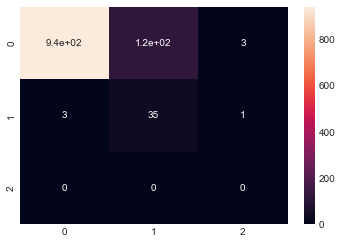

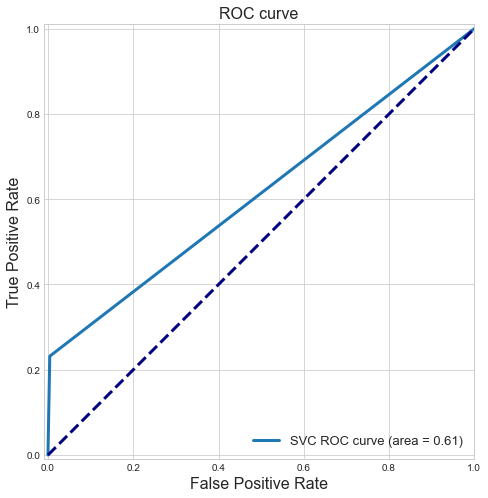

In [34]:
y_pred = nbModel_grid.predict(X.values.reshape(-1, 1))

# confusion matrix
cm = confusion_matrix(y_pred, y1)
sns.heatmap(cm, annot = True)

# classification report
cr = classification_report(y_pred, y1)
print(cr)

print('MAPE:',mean_absolute_percentage_error(y_pred, y1))
print('MAE:', MAE(y_pred, y1))
rms = sqrt(mean_squared_error(y_pred, y1))
print('rmse', rms)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


fpr, tpr, _ = roc_curve(y1 ,y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)
print('AUC score of Logistic: %f'%((roc_auc)*100))

fig, ax1= plt.subplots(figsize=(8,8))
ax1.set_xlim([-0.01, 1.00])
ax1.set_ylim([-0.01, 1.01])
ax1.plot(fpr, tpr, lw=3, label='SVC ROC curve (area = {:0.2f})'.format(roc_auc))
ax1.set_xlabel('False Positive Rate', fontsize=16)
ax1.set_ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
ax1.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
ax1.set_aspect('equal')
plt.show()

### for Daredevil

In [35]:
### Fitting the 5 Fold CV 

nbModel_grid2 = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, verbose=1, cv=5, n_jobs=-1)
nbModel_grid2.fit(X.values.reshape(-1, 1), y2)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=1)

###### Model Evalution

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       563
           1       0.87      0.90      0.88       534

    accuracy                           0.89      1097
   macro avg       0.89      0.89      0.89      1097
weighted avg       0.89      0.89      0.89      1097

MAPE: 287376457535036.2
MAE: 0.11394712853236098
rmse 0.3375605553561627
AUC score of Logistic: 88.606524


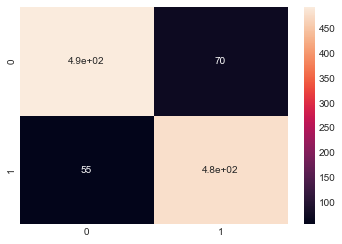

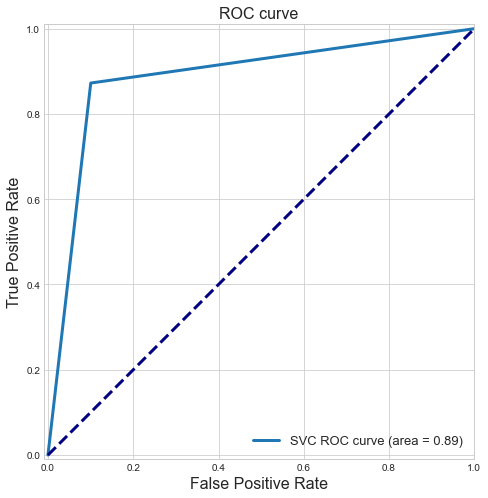

In [36]:
y_pred = nbModel_grid2.predict(X.values.reshape(-1, 1))

# confusion matrix
cm = confusion_matrix(y_pred, y2)
sns.heatmap(cm, annot = True)

# classification report
cr = classification_report(y_pred, y2)
print(cr)

print('MAPE:',mean_absolute_percentage_error(y_pred, y2))
print('MAE:', MAE(y_pred, y2))
rms = sqrt(mean_squared_error(y_pred, y2))
print('rmse', rms)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


fpr, tpr, _ = roc_curve(y2 ,y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)
print('AUC score of Logistic: %f'%((roc_auc)*100))

fig, ax1= plt.subplots(figsize=(8,8))
ax1.set_xlim([-0.01, 1.00])
ax1.set_ylim([-0.01, 1.01])
ax1.plot(fpr, tpr, lw=3, label='SVC ROC curve (area = {:0.2f})'.format(roc_auc))
ax1.set_xlabel('False Positive Rate', fontsize=16)
ax1.set_ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
ax1.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
ax1.set_aspect('equal')
plt.show()

#### For the Bandits

In [37]:
### Fitting the 5 Fold CV 

nbModel_grid3 = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, verbose=1, cv=5, n_jobs=-1)
nbModel_grid3.fit(X.values.reshape(-1, 1), y3)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=1)

#### Model Evaluation

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       561
           1       0.96      0.98      0.97       536

    accuracy                           0.97      1097
   macro avg       0.97      0.97      0.97      1097
weighted avg       0.97      0.97      0.97      1097

MAPE: 94423693190083.33
MAE: 0.0300820419325433
rmse 0.173441753717331
AUC score of Logistic: 96.992874


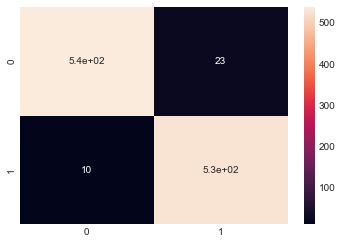

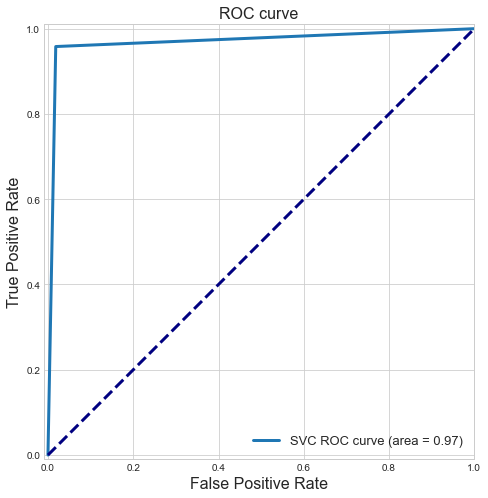

In [38]:
y_pred = nbModel_grid3.predict(X.values.reshape(-1, 1))

# confusion matrix
cm = confusion_matrix(y_pred, y3)
sns.heatmap(cm, annot = True)

# classification report
cr = classification_report(y_pred, y3)
print(cr)

print('MAPE:',mean_absolute_percentage_error(y_pred, y3))
print('MAE:', MAE(y_pred, y3))
rms = sqrt(mean_squared_error(y_pred, y3))
print('rmse', rms)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


fpr, tpr, _ = roc_curve(y3 ,y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)
print('AUC score of Logistic: %f'%((roc_auc)*100))

fig, ax1= plt.subplots(figsize=(8,8))
ax1.set_xlim([-0.01, 1.00])
ax1.set_ylim([-0.01, 1.01])
ax1.plot(fpr, tpr, lw=3, label='SVC ROC curve (area = {:0.2f})'.format(roc_auc))
ax1.set_xlabel('False Positive Rate', fontsize=16)
ax1.set_ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
ax1.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
ax1.set_aspect('equal')
plt.show()

### For Grease

In [39]:
### Importing the Grid Search
from sklearn.model_selection import GridSearchCV

### Fitting the 5 Fold CV 

nbModel_grid4 = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, verbose=1, cv=5, n_jobs=-1)
nbModel_grid4.fit(X.values.reshape(-1, 1), y4)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=1)

##### Model Evaluation

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       563
           1       0.77      0.79      0.78       534

    accuracy                           0.78      1097
   macro avg       0.78      0.78      0.78      1097
weighted avg       0.78      0.78      0.78      1097

MAPE: 517277623563065.2
MAE: 0.21604375569735643
rmse 0.4648050727964965
AUC score of Logistic: 78.396853


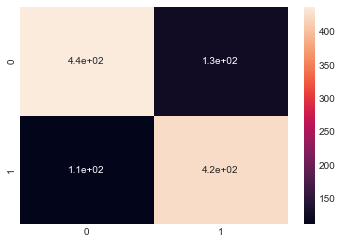

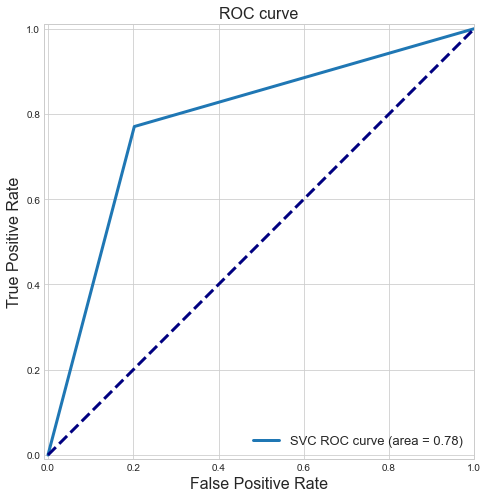

In [40]:
y_pred = nbModel_grid4.predict(X.values.reshape(-1, 1))

# confusion matrix
cm = confusion_matrix(y_pred, y4)
sns.heatmap(cm, annot = True)

# classification report
cr = classification_report(y_pred, y4)
print(cr)

print('MAPE:',mean_absolute_percentage_error(y_pred, y4))
print('MAE:', MAE(y_pred, y4))
rms = sqrt(mean_squared_error(y_pred, y4))
print('rmse', rms)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


fpr, tpr, _ = roc_curve(y4 ,y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)
print('AUC score of Logistic: %f'%((roc_auc)*100))

fig, ax1= plt.subplots(figsize=(8,8))
ax1.set_xlim([-0.01, 1.00])
ax1.set_ylim([-0.01, 1.01])
ax1.plot(fpr, tpr, lw=3, label='SVC ROC curve (area = {:0.2f})'.format(roc_auc))
ax1.set_xlabel('False Positive Rate', fontsize=16)
ax1.set_ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
ax1.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
ax1.set_aspect('equal')
plt.show()

All of our four logistic models on movies are performing all the ranges from insignificant (50%) to signifanct (86%). We have hypertuned our models and perfrom the 70 fits each of all of them. for the optimizwd parameter we have used diffierent penalty levels along with logspace.  The results interpret that the people really enjoyed the movies but the reults accuracy score overall is insignificant. Out of 4 models created only 1 'American pie'shows significant resutls and all the other three pass the threshold and perfromed poorly thus logistic regression failed to prove the ratings have direct correlation with movies enjoyment.